<a href="https://colab.research.google.com/github/MananShukla7/Colab-Notebook/blob/main/04_Computer_Vision_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##0. Computer_vision Libraries

* `torchvision` -base domain lib for pytorch comp vision
* `torchvision.datasets` -get datasets and data loading functions for computer vision here
* `torchvision.models` -get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms` -funtions for manipulating your vision data(images) to be suitable for use with ml models
* `torchvision.data.Dataset` -Base datasets class for Pytorch
* `torch.utils.data.DataLoaders` -Creates a python iterable over a dataset

In [6]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

##1. Getting a dataset

Going to use Fashion MNIST's dataset from torchvision datasets

In [7]:
#Setup training data

In [8]:
train_data=datasets.FashionMNIST(root="data",
                                 train=True,
                                 download=True,
                                 transform=ToTensor(),
                                 target_transform=None)

test_data=datasets.FashionMNIST(root="data",
                                train=False,
                                download=True,
                                transform=ToTensor(),
                                target_transform=None)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [9]:
len(train_data),len(test_data)

(60000, 10000)

In [10]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [11]:
image,label=train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [12]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [13]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [14]:
train_data.train_labels.unique()

/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
#Check the shape of out image

In [16]:
image.shape,label

(torch.Size([1, 28, 28]), 9)

###1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


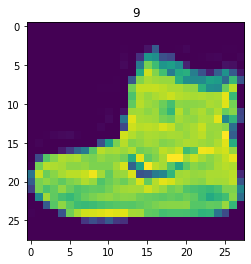

In [17]:
image,label=train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze());
plt.title(label);

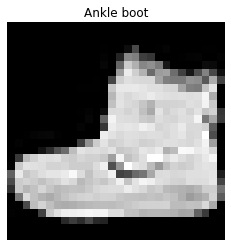

In [18]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label]);
plt.axis(False);

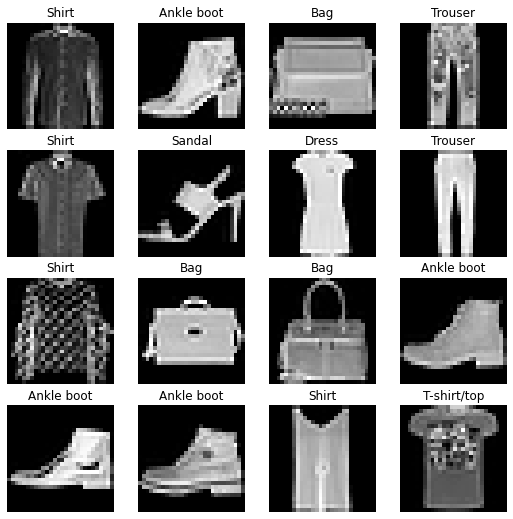

In [19]:
#plot more images
# torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols+1):
  random_idx=torch.randint(0,len(train_data),size=[1]).item()
  img,label=train_data[random_idx]
  plt.subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label]);
  plt.axis(False);

##2. Prepare DataLoader

Righnow the data is in the form of Pytorch Datasets

DataLoader converts data into python iterable

MOre Specifically we want to turn our data into batches or mini-batches

Why mini batches?

- It is more computationally efficient, comp hardaware cant look at all data at one time

- It gives our nn more chances to update its gradients per epoch

In [20]:
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(), Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [21]:
from torch.utils.data import DataLoader
#train
train_dataloader=DataLoader(dataset=train_data,
                            batch_size=32,
                            shuffle=True)


# test
test_dataloader=DataLoader(dataset=test_data,
                            batch_size=32,
                            shuffle=True)

test_dataloader.batch_size,train_dataloader.batch_size,len(train_dataloader),len(test_dataloader) # test_dataloader.size(),train_dataloader.size()
train_batch_size=len(train_dataloader)
train_batch_size

1875

In [22]:
i=iter(train_dataloader)
a=next(i)
print(a[1])
b=next(i)
print(b[1])

tensor([2, 7, 2, 8, 6, 7, 4, 1, 2, 2, 1, 2, 4, 6, 9, 4, 4, 4, 8, 3, 2, 1, 8, 8,
        0, 7, 8, 8, 0, 8, 4, 0])
tensor([4, 7, 6, 6, 6, 2, 8, 9, 5, 7, 6, 2, 0, 1, 6, 8, 5, 6, 6, 0, 0, 1, 9, 9,
        2, 2, 2, 5, 5, 5, 5, 2])


In [23]:
train_features_batch,train_labels_batch=next(iter(train_dataloader))
train_features_batch.size(),train_labels_batch.size()
len(train_features_batch)

32

6


(-0.5, 27.5, 27.5, -0.5)

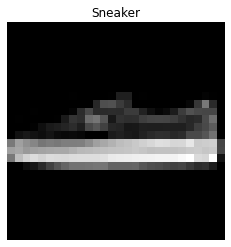

In [24]:
torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
print(random_idx)
img,label=train_features_batch[random_idx],train_labels_batch[random_idx]
# plt.plot(train_features_batch[random_idx])
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)


In [25]:
 ##0. Build a baseline model


In [26]:
#Create a flatten layer
flatten_layer=nn.Flatten()
#Get a single smple
x=train_features_batch[0]
print(x.shape)

output=flatten_layer(x)

print(output.shape)
print(output.squeeze().shape)

torch.Size([1, 28, 28])
torch.Size([1, 784])
torch.Size([784])


In [27]:
28*28

784

In [46]:
from torch import nn
class FashionMNISTmodelV0(nn.Module):
  def __init__(self,inp,outp,hidden):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(inp,hidden),
        nn.Linear(hidden,outp)
    )
  def forward(self,x):
    return self.layer_stack(x)


In [29]:
torch.manual_seed(42)

model_0=FashionMNISTmodelV0(inp=784, #28x28
                            hidden=10,
                            outp=len(class_names)).to("cpu")
model_0


FashionMNISTmodelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [30]:
dummy_x=torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [31]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [32]:
w1,b1,w2,b2=model_0.state_dict().values()

In [33]:
w1.shape,b1.shape,w2.shape,b2.shape

(torch.Size([10, 784]),
 torch.Size([10]),
 torch.Size([10, 10]),
 torch.Size([10]))

## 3.1 Setup loss ,opti and evaluation metrics

- loss_fn = Working with the multi-class data,our loss fn will be `nn.CrossentropuLoss()`
- Opti = Using `torch.optim.SGD()` or `torch.optim.Adam()`
- Metrics = Using the torchmetrics lib amd using `Accurary()` fun

In [34]:
import requests
from pathlib import Path

if Path("help_fn.py").is_file():
  print("Already imported")

else:
  request=requests.get('https://github.com/MananShukla7/Colab-Notebook/raw/main/helper_functions.py')
  with open("help_fn.py","wb") as f:
    f.write(request.content)

Already imported


In [37]:
from torchmetrics import Accuracy
# !pip install torchmetrics
acc=Accuracy(task='multiclass',num_classes=len(class_names))

loss_fn=nn.CrossEntropyLoss()
opti=torch.optim.SGD(params=model_0.parameters(),lr=0.1)

###Creating the func to time our experiments

Machine learning is very experimental

two of the main things you'll often want to track are:

1. Model's performance
2. How fat it runs

In [39]:
from timeit import default_timer as timer

def print_train_time(start:float,
                     end:float,
                     device:torch.device=None):
  """Print diff bw start and end time"""
  total_time=end-start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [40]:
start_time=timer()
#some code...
end_time=timer()
print_train_time(start_time,end_time,device="cpu")


Train time on cpu: 0.000 seconds


7.341699995322415e-05

###3.3 Creating a training loop and train a model on batches of data

1. Loop throug epochs
2. Loop through training batches,perform training steps,calc the train loss *per batch*
3. Loop through testing batches,perform testing steps,calc the test loss *per batch*.
4. Print out whats happening.
5. Time it all(for fun)

In [47]:
#Import tqdm for progress bar
from tqdm.auto import tqdm
torch.manual_seed(42)
train_time_start_on_cpu=timer()

#epochs
epochs=3

#Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epochs:{epoch}\n-----")
  ##Training
  train_loss=0
  #add a poop to loop through the training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    #1. Forward pass
    y_pred=model_0(X)

    #2.calc the loss(per batch)
    loss=loss_fn(y_pred,y)
    train_loss+=loss
    
    opti.zero_grad()

    loss.backward()

    #NOTE: the opti will update the params of the model once per batch instead of once per epoch!
    opti.step()

    #Print out whats happenin
    if batch%400==0:
      print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples.")
    
  #Divide total traon loss by len of train dataloader
  train_loss/=len(train_dataloader)
  
  ###Testing 
  test_loss,test_acc=0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      #1. Forward pass
      test_pred=model_0(X_test)

      #Calc the loss
      test_loss+=loss_fn(test_pred,y_test)

      test_acc=acc(test_pred.argmax(dim=1),y_test)

    #Calc the test loss avg per batch
    test_loss/=len(test_dataloader)

    #Calc the test acc avg per batch
    test_acc/=len(test_dataloader)
  #print out
  print(f"\nTrain Loss: {train_loss:.4f} |  test Loss: {test_loss:.4f} |  Test acc: {test_acc:.4f} | Train acc: {acc:.4f}")

  #calc training time
  train_time_end_on_cpu=timer()
  #calc the train time
  total_train_time_model_0=print_train_time(train_time_end_on_cpu-train_time_start_on_cpu,device=str(next(model_0.parameters()).device))






  0%|          | 0/3 [00:00<?, ?it/s]

Epochs:0
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


TypeError: ignored

In [42]:
next(model_0.parameters()).device

device(type='cpu')